In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [34]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [35]:
len(y_train)

60000

In [36]:
len(y_test)

10000

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
for i in range(len(X_train)):
    print(X_train[i])
    if i == 10:
        break

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [39]:
X_train[0].shape

(28, 28)

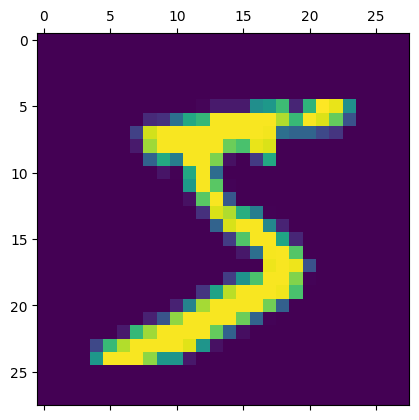

In [40]:
plt.matshow(X_train[0])

In [41]:
X_train.shape

(60000, 28, 28)

In [42]:
X_train = X_train / 255
X_test = X_test / 255

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [57]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [51]:
X_train_flattened.shape

(60000, 784)

In [55]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    
])

C:\Users\Rajpurohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [58]:
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8080 - loss: 0.7249
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9120 - loss: 0.3120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9203 - loss: 0.2873
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9238 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9264 - loss: 0.2661


In [59]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9140 - loss: 0.3046


[0.2678271532058716, 0.9244999885559082]

In [60]:
model.metrics_names

['loss', 'compile_metrics']

In [61]:
y_predicted = model.predict(X_test_flattened)
y_predicted

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[2.2548106e-02, 4.9540063e-07, 5.3753287e-02, ..., 9.9981898e-01,
        1.1547829e-01, 7.1593839e-01],
       [3.3973259e-01, 7.2366819e-03, 9.9921107e-01, ..., 8.8050427e-13,
        1.5303221e-01, 2.1623376e-09],
       [4.1388068e-04, 9.9404263e-01, 6.4090288e-01, ..., 1.5170613e-01,
        3.4906164e-01, 5.4180544e-02],
       ...,
       [4.0739619e-06, 8.0508416e-06, 1.0411825e-03, ..., 3.3888322e-01,
        5.6693041e-01, 8.2863361e-01],
       [1.0860572e-04, 2.4372012e-04, 1.2148732e-04, ..., 4.3496831e-05,
        6.1324608e-01, 1.7376569e-04],
       [5.6747710e-03, 1.1323309e-09, 1.1880268e-01, ..., 2.1503130e-08,
        1.9319236e-04, 1.6801943e-06]], dtype=float32)

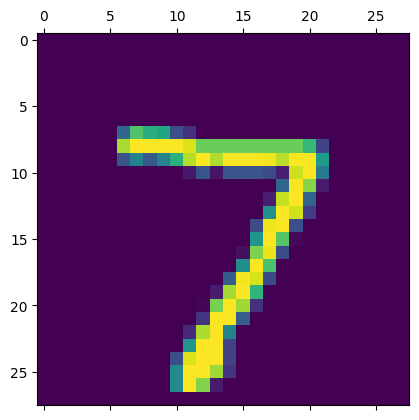

In [63]:
plt.matshow(X_test[0])

In [64]:
np.argmax(y_predicted[0])

7

In [68]:
arr = np.array([1, 2, 3][ 4, 5])
arr

<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
C:\Users\Rajpurohit\AppData\Local\Temp\ipykernel_11860\3039038665.py:1: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  arr = np.array([1, 2, 3][ 4, 5])


TypeError: list indices must be integers or slices, not tuple

In [67]:
np.argmin(arr)

0

In [69]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 6,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 6,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 2,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 9,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 8,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [70]:
cmd = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cmd

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    2,    0,    5,   12,    3,    1,    0],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   5,   11,  915,   20,    8,    3,   14,   11,   40,    5],
       [   2,    0,   15,  931,    0,   17,    3,   11,   21,   10],
       [   1,    1,    2,    2,  898,    0,   15,    4,    9,   50],
       [   9,    3,    2,   40,   10,  754,   20,    8,   39,    7],
       [   7,    3,    4,    1,    7,    7,  925,    2,    2,    0],
       [   1,    5,   21,    6,    6,    1,    0,  950,    3,   35],
       [   7,   15,    5,   21,    8,   21,   11,   13,  865,    8],
       [  10,    7,    1,   10,   16,    7,    0,   22,    4,  932]])>

In [71]:
import seaborn as sn

<Axes: >

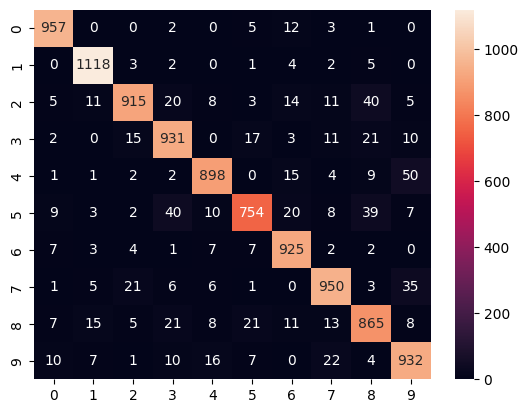

In [74]:
sn.heatmap(cmd,annot=True,fmt='d')

In [75]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

C:\Users\Rajpurohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8741 - loss: 0.4526
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9612 - loss: 0.1324
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9749 - loss: 0.0867
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9804 - loss: 0.0656
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9843 - loss: 0.0494


In [76]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.1066


[0.08711686730384827, 0.9733999967575073]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

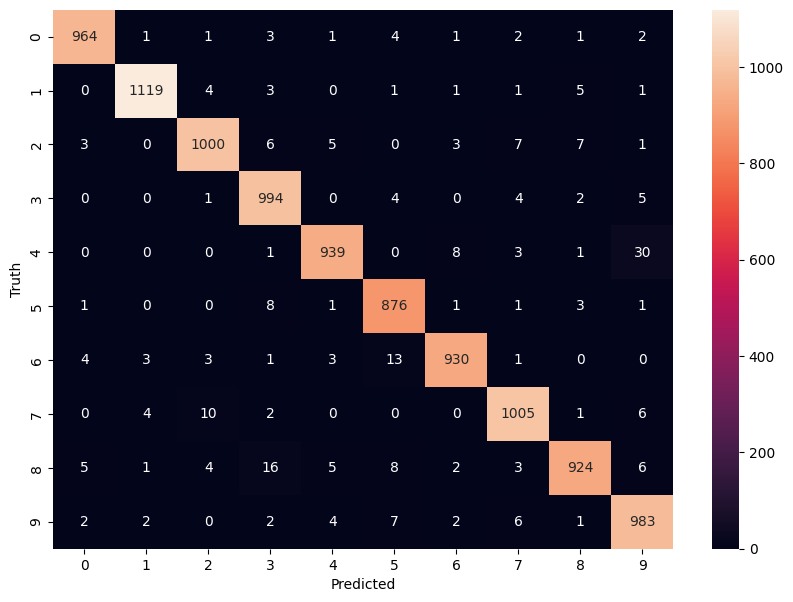

In [77]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

C:\Users\Rajpurohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8703 - loss: 0.4638
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9593 - loss: 0.1378
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9727 - loss: 0.0939
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9795 - loss: 0.0686
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0520
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0408
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9910 - loss: 0.0318
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9921 - loss: 0.0287
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9928 - loss: 0.0239
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9951 - loss: 0.0168


In [79]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9708 - loss: 0.1013


[0.09153784066438675, 0.9749000072479248]